# Introduction

# Importing the Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Data Ingestion

In [36]:
# Extracting relevant data from table found on a various websites through the pd.read_html command
pe = pd.read_html('http://www.multpl.com/table')
prices = pd.read_html('http://www.multpl.com/s-p-500-historical-prices/table')
price_to_book_value = pd.read_html('http://www.multpl.com/s-p-500-price-to-book/table/by-year')

#The pd.read_html command returns a list of dataframe objects. In order to get my information in the form of a dataframe object [singular]
# I will access the first element from the list of objects, assigning each one a variable name
a = pe[0]
b = prices[0]
c = price_to_book_value[0]



### Initial Look at the data

In [37]:
a.head()
#a.shape

,0,1
0,Date,Value Value
1,"Aug 9, 2018",24.76 estimate
2,"Jan 1, 2018",24.97
3,"Jan 1, 2017",23.59
4,"Jan 1, 2016",22.18


In [38]:
b.head()
#b.shape

,0,1
0,Date,Price Value
1,"Aug 8, 2018",2861.05
2,"Jan 1, 2018",2789.80
3,"Jan 1, 2017",2275.12
4,"Jan 1, 2016",1918.60


In [39]:
c.head()
#c.shape

,0,1
0,Date,Value Value
1,"Aug 9, 2018",3.46 estimate
2,"Dec 29, 2017",3.23
3,"Dec 31, 2016",2.91
4,"Dec 31, 2015",2.76


# Data Preparation

### The first step that we need to take is assigning the data column as the index

In [40]:
a.columns = ['Date', 'Value']
a.drop(a.index[:2], inplace=True)


In [41]:
new_pe = a.set_index('Date', drop = True)
new_pe.head()

,Value
Date,
"Jan 1, 2018",24.97
"Jan 1, 2017",23.59
"Jan 1, 2016",22.18
"Jan 1, 2015",20.02
"Jan 1, 2014",18.15


In [42]:
b.columns = ['Date', 'PriceValue']
b.drop(b.index[:2], inplace=True)


In [43]:
new_prices = b.set_index('Date', drop = True)
new_prices.head()

,PriceValue
Date,
"Jan 1, 2018",2789.80
"Jan 1, 2017",2275.12
"Jan 1, 2016",1918.60
"Jan 1, 2015",2028.18
"Jan 1, 2014",1822.36


In [44]:
c.columns = ['Date', 'Value2']
c.drop(c.index[:2], inplace=True)

In [45]:
new_price_to_book_value = c.set_index('Date', drop = True)
new_price_to_book_value.head()


,Value2
Date,
"Dec 29, 2017",3.23
"Dec 31, 2016",2.91
"Dec 31, 2015",2.76
"Dec 31, 2014",2.83
"Dec 31, 2013",2.58


In [46]:
print(type(new_price_to_book_value))

<class 'pandas.core.frame.DataFrame'>


### The next step is to do check for any null values ###

In [47]:
new_pe.isnull().any()

Value    False
dtype: bool

In [48]:
new_prices.isnull().any()

PriceValue    False
dtype: bool

In [49]:
new_price_to_book_value.isnull().any()

Value2    False
dtype: bool

### We can now begin to do initial exploration of the data ###

/Users/akshat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Date')

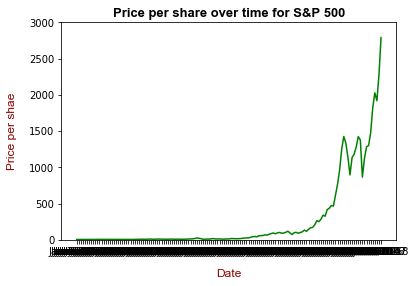

In [50]:
new_prices = new_prices.convert_objects(convert_numeric=True)
plt.plot(new_prices.sort_values(by = ['Date']), 'g')


#ensuring that the visualisation is truthful
axes = plt.gca()
axes.set_ylim([0,3000])

#Stylistic design
x = font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'regular',
        'size': 12,
        }

y = font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'regular',
        'size': 12,
        }


z = font = {'family': 'arial',
        'color':  'black',
        'weight': 'heavy',
        'size': 13,
        }


#labels
plt.ylabel("Price per shae", fontdict=x, labelpad = 12)
plt.title('Price per share over time for S&P 500', fontdict=z)
plt.xlabel('Date', fontdict=y, labelpad = 12)

#since the x tickes are overlapping one another, one possible solution that I had was to only have each 32th label
# instead, as demonstrated on the graph
#Also, a major problem is how how we have the x axis in descending order, not ascending order



/Users/akshat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Date')

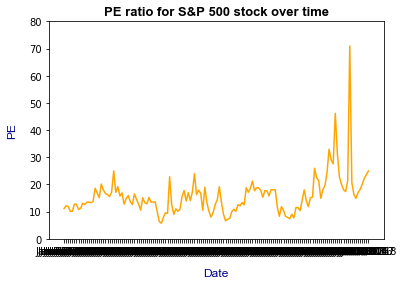

In [51]:
new_pe = new_pe.convert_objects(convert_numeric=True)
plt.plot(new_pe.sort_values(by = ['Date']), 'orange')

#ensuring that the visualisation is truthful
axes = plt.gca()
axes.set_ylim([0,80])

#Stylistic design
x = font = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'regular',
        'size': 12,
        }

y = font = {'family': 'arial',
        'color':  'darkblue',
        'weight': 'regular',
        'size': 12,
        }


z = font = {'family': 'arial',
        'color':  'black',
        'weight': 'heavy',
        'size': 13,
        }


#labels
plt.ylabel("PE", fontdict=x, labelpad = 12)
plt.title('PE ratio for S&P 500 stock over time', fontdict=z)
plt.xlabel('Date', fontdict=y, labelpad = 12)



In [52]:
#The problem with using the sort_values function on this final variable is that since one of the dates is dec 29th, it 
# ranks first in ascending order, despite it being 2017. Therfore, we strip it out

new_price_to_book_value = new_price_to_book_value.iloc[1:]

/Users/akshat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


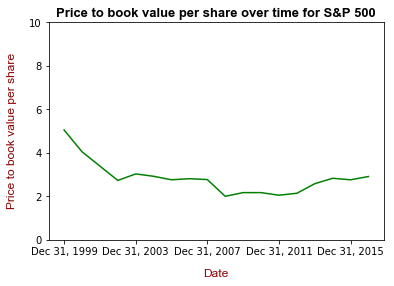

In [53]:
new_price_to_book_value = new_price_to_book_value.convert_objects(convert_numeric=True)
plt.plot(new_price_to_book_value.sort_values(by = ['Date']), 'g',)


#ensuring that the visualisation is truthful
axes = plt.gca()
axes.set_ylim([0,10])

#Stylistic design
x = font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'regular',
        'size': 12,
        }

y = font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'regular',
        'size': 12,
        }


z = font = {'family': 'arial',
        'color':  'black',
        'weight': 'heavy',
        'size': 13,
        }


#labels
plt.ylabel("Price to book value per share", fontdict=x, labelpad = 12)
plt.title('Price to book value per share over time for S&P 500', fontdict=z)
plt.xlabel('Date', fontdict=y, labelpad = 12)

#since the x tickes are overlapping one another, one possible solution that I had was to only have each 4th label
# instead, as demonstrated on the graph
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(4)
axes.xaxis.set_major_locator(myLocator)

### Filtering out the data so as to ensure uniformity

In [54]:
# There exists a different timeframe for each of the variables that are being analysed. Rather than attempting to try
# and filter them all out, what we can do is create a datatime object that covers a certain period/span of time, and then 
# grab the values that fit that timespan for each of the variables.

years = pd.date_range(start='1/1/2000', end='1/1/2016', freq='Y')

#Now go ahead and filter the various variables so that the number of datapoints matches that of the years variable

new_price_to_book_value_filtered = new_price_to_book_value.iloc[0:17]
new_pe_filtered = new_pe.iloc[2:19]
new_prices_filtered = new_prices.iloc[2:19]

In [55]:
#Getting just the values of the newly define variables
sorted_new_pe_filtered = new_pe_filtered.sort_values(by = ['Date']).values
sorted_new_price_to_book_value_filtered = new_price_to_book_value_filtered.sort_values(by = ['Date']).values
sorted_new_prices_filtered = new_prices_filtered.sort_values(by = ['Date']).values

# Data Analysis Pt I

Text(0.5,0,'P/E ratio')

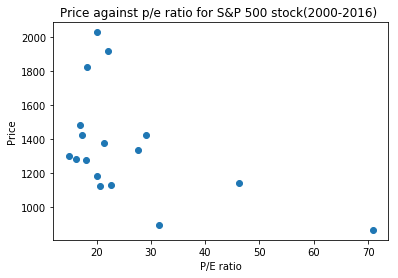

In [56]:
x = sorted_new_pe_filtered
y = sorted_new_prices_filtered

plt.scatter(x,y)

plt.ylabel("Price")
plt.title('Price against p/e ratio for S&P 500 stock(2000-2016) ')
plt.xlabel('P/E ratio')

In [57]:
from scipy import stats
from scipy.stats.stats import pearsonr
#First output is the coefficient value and the second output is the p_value
pearsonr(x, y)


(array([-0.49319014]), array([0.04425422]))

Text(0.5,0,'Bookvalue to price ratio(P/B) ')

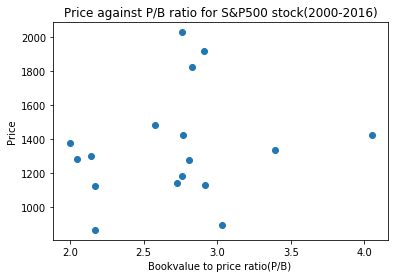

In [64]:
x = sorted_new_price_to_book_value_filtered
y = sorted_new_prices_filtered

plt.scatter(x,y)

plt.ylabel("Price")
plt.title('Price against P/B ratio for S&P500 stock(2000-2016)')
plt.xlabel('Bookvalue to price ratio(P/B) ')



In [408]:
from scipy import stats
from scipy.stats.stats import pearsonr
#First output is the coefficient value and the second output is the p_value
pearsonr(x, y)


(array([0.18948484]), array([0.46637093]))

# Data Analysis Pt II

Now, something that should first be said regarding the Pe ratio is what implications they hold regarding the nature of a particular stock. The p/e ratio or price to earning ratio essentially looks at how much of the firms revenue you are for a particular price. Now imagine that a stock were to be the same price, and consider it having a lower p/e ratio as opposed to a higher p/e ratio. If it were to have a higher p/e ratio, that would mean that it the price was being divided by less 'earnings', which would mean the stock would be overvalued as compared to a lower p/e ratio. Therefore, if the p/e ratio is above a certain amount, we can assume the market is currently overvalued (considering that the s&p 500 stock is an indicator of the entire NASDAQ stock exchange platform as a whole)

In [310]:
# getting average p/e of S&P 500 stock
new_pe_filtered.describe()

,Value
count,17.000000
mean,25.527059
std,13.929545
min,14.870000
25%,18.070000
50%,20.700000
75%,27.550000
max,70.910000


In [311]:
#getting average price to book value of S&P 500 stock
new_price_to_book_value_filtered.describe()

,Value2
count,16.000000
mean,2.840625
std,0.795935
min,2.000000
25%,2.170000
50%,2.765000
75%,2.947500
max,5.050000


In [341]:
new_price_to_book_value_filtered_new_index = new_price_to_book_value_filtered.reset_index(drop=True)
new_pe_filtered_new_index = new_pe_filtered.reset_index(drop=True)
df = pd.concat([new_price_to_book_value_filtered_new_index, new_pe_filtered_new_index], axis=1)
df = features.dropna()

In [342]:
df['y'] = (df['Value2']<2.84)*1 &(df['Value']>25.527)*1

In [344]:
features = ['Value2', 'Value']

In [345]:
X = df[features].copy()

In [346]:
y=df[['y']].copy()

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [348]:
type(X_train)
type(X_test)
type(y_train)
type(y_test)
X_train.head()


,Value2,Value
13,3.39,31.43
15,5.05,27.55
7,2.77,70.91
10,2.92,18.07
0,2.83,22.18


In [351]:
#default for number of lead nodes is infinite, so, if end criteria not specified, there is potential for the decision tree to overfit the data
# random state has to do with splitting the nodes.
stockmarket_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
stockmarket_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [352]:
predictions = stockmarket_classifier.predict(X_test)

In [358]:
predictions[:10]

array([0, 0, 0, 0, 0, 0])

In [357]:
accuracy_score(y_true = y_test, y_pred = predictions)

1.0

In [413]:
predictions2 = stockmarket_classifier.predict(X_train)

In [414]:
predictions2[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])